<a href="https://colab.research.google.com/github/adeniyiaisha/My-AI-journey/blob/main/Raisin_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Install libraries
! pip list


Package                               Version
------------------------------------- ------------------
absl-py                               1.4.0
absolufy-imports                      0.3.1
accelerate                            1.10.1
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.12.15
aiosignal                             1.4.0
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.2
alembic                               1.16.5
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.10.0
anywidget                             0.9.18
argon2-cffi                           25.1.0
argon2-cffi-bindings                  25.1.0
array_record                          0.8.1
arrow 

In [ ]:
#@title import packages
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
#@title Load data
df = pd.read_excel('/content/drive/MyDrive/Raisin_Dataset.xlsx')

In [ ]:
df.head(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
5,49242,318.125407,200.122120,0.777351,51368,0.658456,881.836,1
6,42492,310.146072,176.131449,0.823099,43904,0.665894,823.796,1
7,60952,332.455472,235.429835,0.706058,62329,0.743598,933.366,1
8,42256,323.189607,172.575926,0.845499,44743,0.698031,849.728,1
9,64380,366.964842,227.771615,0.784056,66125,0.664376,981.544,1


In [ ]:
print(df.columns)

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')


In [ ]:
#@title Extract class
raisin_classess= df['Class'].unique()
classes = {unique_class:id for id, unique_class in enumerate(raisin_classess)}
print(classes)

{'Kecimen': 0, 'Besni': 1}


In [ ]:
df['Class'] = df['Class'].replace({'Kecimen': 1, 'Besni': 0})


In [ ]:
raisin_classes = df['Class'].unique()
raisin_classes


array([1, 0])

In [ ]:
#@title Split data
train_dataset, test_dataset = train_test_split(df, test_size=0.2)
x_train = train_dataset.drop('Class', axis=1)
y_train = train_dataset['Class']
x_test = test_dataset.drop('Class', axis=1)
y_test = test_dataset['Class']

In [ ]:
#@title Train model
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#@title Test Model
y_pred = model.predict(x_test)

In [ ]:
#@title Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8833333333333333


In [ ]:
#@title Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[83  8]
 [13 76]]


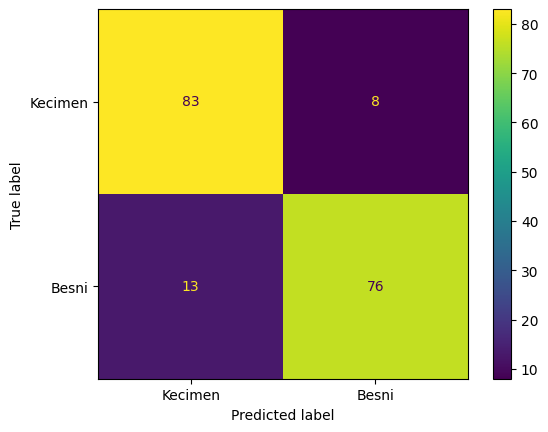

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
cm_display.plot()

In [ ]:
#@title Cross Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x_train, y_train, cv=cv, scoring='accuracy')
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [0.88194444 0.81944444 0.89583333 0.84722222 0.84027778]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
print("Cross-Validation Scores:",scores)

Cross-Validation Scores: [0.88194444 0.81944444 0.89583333 0.84722222 0.84027778]
